# Homework
Note: I did not write anything on paper, I just used software.

In [2]:
import pandas as pd
import math

In [3]:
traindata = { "Color": ["black","white","black","red","black","white"],
             "Size": ["large","small","small","large","large","large"],
             "Time": ["day","night", "day", "night", "night", "night"],
             "Caught":["yes","yes","yes","no","no","no"] }
testdata = { "Color": ["black","red","white"],
             "Size": ["small","small","large"],
             "Time": ["night","night", "day"],
              }
train_df = pd.DataFrame(traindata)
test_df = pd.DataFrame(testdata)
#x_train = train_df[["Color","Size","Time"]]
#y_train= train_df["Caught"]


In [37]:
train_df.describe()

,Color,Size,Time,Caught
count,6,6,6,6
unique,3,2,2,2
top,black,large,night,yes
freq,3,4,4,3


In [38]:
#Entropy function (from class)
def entropy(probabilities):
    """Compute the entropy
    probabilities: a list of probabilities
    """
    # Check if the sum of probabilities is approximately 1, throw an error otherwise
    assert sum(probabilities) > 0.99 and sum(probabilities) < 1.01, "The sum of probabilities is not 1"
    return sum([-p * math.log(p, 2) for p in probabilities if p != 0])

#### Computation of the entropy of the original set
We first have to compute the the entropy of the original set. We'll use the above function.

When computing the subset entropies, I use a different method as here. There, I create the subset dataframes, and calculate the probabilities based on their size. Here, for demonstration, I count each instance having a specific attribute value with the below defined function, then divide by the overall size. Of course, this is verbose.

In [6]:
#Just a demonstration function used for getting the probabilities used by the entropy function
def amount_of_val_in_attribute(val, attribute):
    amount = 0
    for index, value in attribute.items():
        if value == val : amount += 1
    return amount

In [7]:
#First get the probabilities
L = len(train_df["Caught"]) # Save the size of the set for later
p_of_yes = amount_of_val_in_attribute("yes",train_df["Caught"]) / L # 50%
p_of_no = amount_of_val_in_attribute("no",train_df["Caught"]) / L # 50%
#Then call the entropy function
Set0_entropy = entropy([p_of_yes, p_of_no])

The entropy of the original set (named set 0, and as I go deeper each level from the root, I will name the sets of sublayers by set 1, set 2 etc.) equals to 1, the highest possible.

## First iteration (first layer after root)

Lets check how the entropy changes as one would split by each argument at once.

Here I already create subset dataframes, and use their sizes for probabilities.

In [8]:
#Time split
Set0_split_night=train_df[train_df.values=="night"] # I mean.. it's iffy to use df.values because it is safer, more clean to use just df[column]=="whatever". But in this case it works 100% (all values in all columns are different) and this is faster to CTRL-C CTRL-V
Set0_split_night_yes = Set0_split_night[Set0_split_night.values == "yes"]
Set0_split_night_no = Set0_split_night[Set0_split_night.values == "no"]
Set0_split_day = train_df[train_df.values=="day"]
Set0_split_day_yes = Set0_split_day[Set0_split_day.values == "yes"]
Set0_split_day_no = Set0_split_day[Set0_split_day.values == "no"]

#Probabilities: [AllYes/All , AllNo/All]
Set0_split_night_entropy = entropy([len(Set0_split_night_yes)/ len(Set0_split_night), len(Set0_split_night_no)/len(Set0_split_night) ])
Set0_split_day_entropy = entropy([len(Set0_split_day_yes)/ len(Set0_split_day), len(Set0_split_day_no)/len(Set0_split_day) ])

Set0_split_time_information_gain = Set0_entropy - len(Set0_split_night)/L * Set0_split_night_entropy - len(Set0_split_day)/L * Set0_split_day_entropy
Set0_split_time_information_gain
print(f"Nighttime entropy: {Set0_split_night_entropy}. Daytime entropy: {Set0_split_day_entropy}. Overall time information gain: {Set0_split_time_information_gain}")

Nighttime entropy: 0.8112781244591328. Daytime entropy: 0.0. Overall time information gain: 0.4591479170272448


In [9]:
print(entropy([0.68,0.32]))
len(Set0_split_night)/L

0.904381457724494


0.6666666666666666

In [22]:
#Size split
Set0_split_large=train_df[train_df.values=="large"]
Set0_split_large_yes = Set0_split_large[Set0_split_large.values == "yes"]
Set0_split_large_no = Set0_split_large[Set0_split_large.values == "no"]
Set0_split_small = train_df[train_df.values=="small"]
Set0_split_small_yes = Set0_split_small[Set0_split_small.values == "yes"]
Set0_split_small_no = Set0_split_small[Set0_split_small.values == "no"]

Set0_split_large_entropy = entropy([len(Set0_split_large_yes)/ len(Set0_split_large), len(Set0_split_large_no)/len(Set0_split_large) ])
Set0_split_small_entropy = entropy([len(Set0_split_small_yes)/ len(Set0_split_small), len(Set0_split_small_no)/len(Set0_split_small) ])

Set0_split_size_information_gain = Set0_entropy - len(Set0_split_small)/L * Set0_split_small_entropy - len(Set0_split_large)/L * Set0_split_large_entropy
print(f"Large size entropy: {Set0_split_large_entropy}. Small size entropy: {Set0_split_small_entropy}. Overall size information gain: {Set0_split_size_information_gain}")

Large size entropy: 0.8112781244591328. Small size entropy: 0.0. Overall size information gain: 0.4591479170272448


In [23]:
#Color split
Set0_split_black=train_df[train_df.values=="black"]
Set0_split_black_yes = Set0_split_black[Set0_split_black.values == "yes"]
Set0_split_black_no = Set0_split_black[Set0_split_black.values == "no"]
Set0_split_white = train_df[train_df.values=="white"]
Set0_split_white_yes = Set0_split_white[Set0_split_white.values == "yes"]
Set0_split_white_no = Set0_split_white[Set0_split_white.values == "no"]
Set0_split_red=train_df[train_df.values=="red"]
Set0_split_red_yes = Set0_split_red[Set0_split_red.values == "yes"]
Set0_split_red_no = Set0_split_red[Set0_split_red.values == "no"]

Set0_split_black_entropy = entropy([len(Set0_split_black_yes)/ len(Set0_split_black), len(Set0_split_black_no)/len(Set0_split_black) ])
Set0_split_white_entropy = entropy([len(Set0_split_white_yes)/ len(Set0_split_white), len(Set0_split_white_no)/len(Set0_split_white) ])
Set0_split_red_entropy = entropy([len(Set0_split_red_yes)/ len(Set0_split_red), len(Set0_split_red_no)/len(Set0_split_red) ])

Set0_split_color_information_gain = Set0_entropy - len(Set0_split_black)/L * Set0_split_black_entropy - len(Set0_split_white)/L * Set0_split_white_entropy - len(Set0_split_red)/L * Set0_split_red_entropy
print(f"Black color entropy: {Set0_split_black_entropy}. White color entropy: {Set0_split_white_entropy}. Red color entropy: {Set0_split_red_entropy}. Overall size information gain: {Set0_split_color_information_gain}")

Black color entropy: 0.9182958340544896. White color entropy: 1.0. Red color entropy: 0.0. Overall size information gain: 0.2075187496394219


### Conclusion
As we see that we gain more information by splitting time or size, we should first split by one of them. Let's split by time.

We are lucky, that because Set0_split_day_entropy equals 0, because in the training data time == day => caught == yes. So we get a leaf in the tree already, and we only have to check the case, when the time is night.
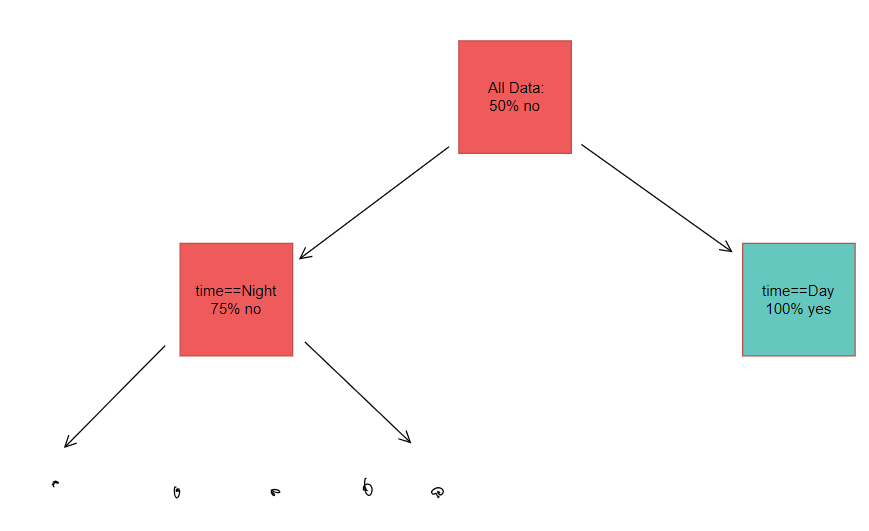

In [32]:
#Set the new level
Set1 = Set0_split_night
Set1_entropy = Set0_split_night_entropy
L1 = len(Set0_split_night)
Set1

,Color,Size,Time,Caught
1,white,small,night,yes
3,red,large,night,no
4,black,large,night,no
5,white,large,night,no


## Second iteration 

Lets check how the entropy changes again.

In [33]:
Set1_split_large=Set1[Set1.values=="large"]
Set1_split_large_yes = Set1_split_large[Set1_split_large.values == "yes"]
Set1_split_large_no = Set1_split_large[Set1_split_large.values == "no"]
Set1_split_small = Set1[Set1.values=="small"]
Set1_split_small_yes = Set1_split_small[Set1_split_small.values == "yes"]
Set1_split_small_no = Set1_split_small[Set1_split_small.values == "no"]

Set1_split_large_entropy = entropy([len(Set1_split_large_yes)/ len(Set1_split_large), len(Set1_split_large_no)/len(Set1_split_large) ])
Set1_split_small_entropy = entropy([len(Set1_split_small_yes)/ len(Set1_split_small), len(Set1_split_small_no)/len(Set1_split_small) ])

Set1_split_size_information_gain = Set1_entropy - len(Set1_split_small)/L1 * Set1_split_small_entropy - len(Set1_split_large)/L1 * Set1_split_large_entropy
print(f"Large size entropy: {Set1_split_large_entropy}. Small size entropy: {Set1_split_small_entropy}. Overall size information gain: {Set1_split_size_information_gain}")

Large size entropy: 0.0. Small size entropy: 0.0. Overall size information gain: 0.8112781244591328


This is maximal information gain, we can just stop here. Do not have to use the color information, in this small training set it does not make a difference. (Note: color split can't bring maximal information gain, as there is a nighttime white insect which was caught, and one which wasn't)

Basically, the digital logic associated with our decision-tree: if time == day THEN yes, else if size == small THEN yes, else no
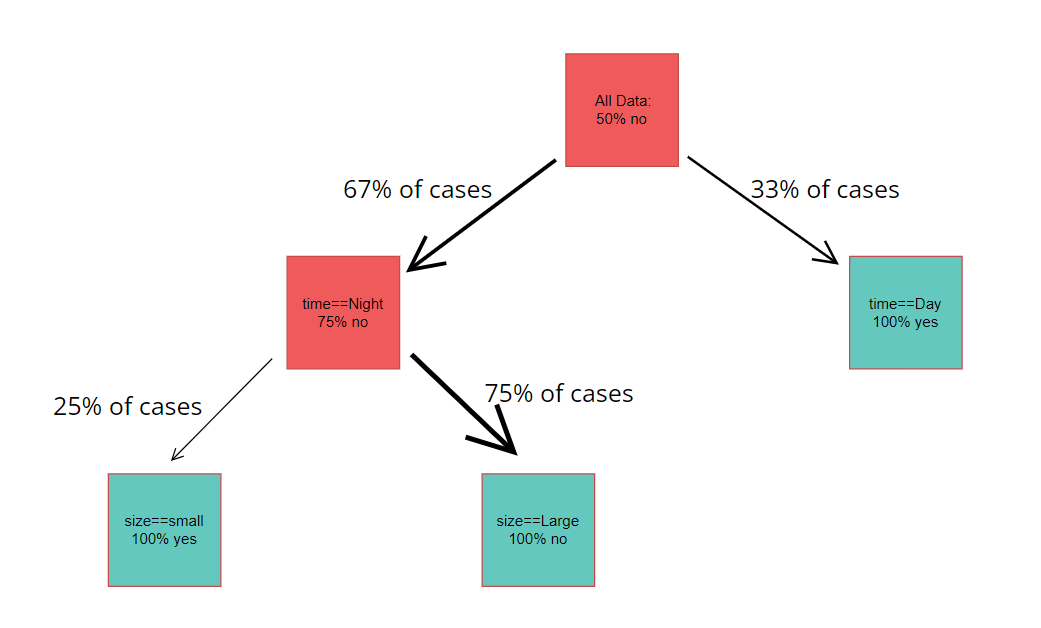

## Testing

In [34]:
def our_tree(dataframe):
    answers =[]
    for index, row in dataframe.iterrows():
        if row["Time"] == "day":
            answers.append("yes")
            continue
        else:
            if row["Size"] == "small":
                answers.append("yes")
                continue
            else:
                answers.append("no")
    return answers

In [35]:
test_df

,Color,Size,Time
0,black,small,night
1,red,small,night
2,white,large,day


In [36]:
our_tree(test_df)

['yes', 'yes', 'yes']

This checks out, as in one case we have daytime, in other cases the insect is small.